In [1]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import pandas as pd

读入数据

In [2]:
def read_excel(file,sheet):
    #ExcelFile = xlrd.open_workbook('q1normalization.xlsx')
    ExcelFile = xlrd.open_workbook(file)
    print(ExcelFile.sheet_names())
    sheet = ExcelFile.sheet_by_name(sheet)
    nrows = sheet.nrows
    ncols = sheet.ncols
    matric = np.zeros((nrows,ncols))
    for x in range(ncols):
        cols = sheet.col_values(x)
        matric[:,x] = cols
    print(matric.shape)
    return matric

随机打乱函数

In [3]:
def shuffled(matric,size):
    m = matric.shape[0]
    permutation = list(np.random.permutation(m))  # 生成一个随机序列，范围是0~m-1，然后转成列表
    shuffled_X = matric[permutation, :]  # 呃，这个就是打乱，但是这个写法有点6
    return shuffled_X[0:size,:]

In [4]:
def plot_scatter(res):
    # plt.plot(np.squeeze(res))
    # plt.ylabel('rank')
    # plt.xlabel('times')
    # plt.show()
    plt.figure('Scatter fig')
    ax = plt.gca()
    ax.set_xlabel('index')
    ax.set_ylabel('rank')
    ax.scatter(range(res.shape[1]), res, c='r', s=20, alpha=0.5)
    plt.show()

In [5]:
def discrimination(matric):
    nrow,ncol = matric.shape
    weight = np.zeros((1,ncol))
    for j in range(ncol):
        aver = np.mean(matric[:,j])
        var = np.var(matric[:,j])
        var = np.sqrt(var)
        weight[0,j] = var / aver
    return weight

In [6]:
def normfun(x,mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

读入数据到matric

In [7]:
matric = read_excel('q1normalization.xlsx','Sheet4')


['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']
(114183, 16)


初始化权重向量

In [ ]:
w = np.array(
        [0.6060995, 1.72514103, 0.07770036, 0.04988332, 0.26925448, 0.74232791, 0.27501334, 0.59462606, 1.22091219,
         1.31281822, 0.94510002, 0.17077944, 0.66019965, 0.24071597, 0.13916047, 0.33999455])

In [8]:
w = np.array(
        [0.6060995, 1.72514103, 0.07770036, 0.04988332, 0.26925448, 0.74232791, 0.27501334, 0.59462606, 2.22091219,
         1.31281822, 0.34510002, 2.17077944, 0.66019965, 0.24071597, 0.13916047, 0.33999455])

得到打乱以后matric，样本数为size

In [40]:
matric_shuffled = shuffled(matric,size = 1000)

res.shape =  (1, 114183)
rows =  1000
cols =  16
d1's shape =  (1, 1000)
d2's shape =  (1, 1000)


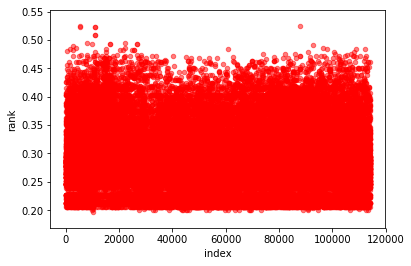

In [43]:
# 初始化参数变量

rows,cols = matric_shuffled.shape
d1_shuffled = np.zeros((1,rows))
d2_shuffled = np.zeros((1, rows))
res_shuffled = np.zeros((1, rows))
bestNode = np.zeros((1,cols))
worseNode = np.ones((1,cols))
res_shuffled = calTopsis(matric_shuffled,d1,d2,rows)

print("rows = ",rows)
print("cols = ",cols)
print("d1's shape = ",d1_shuffled.shape)
print("d2's shape = ",d1_shuffled.shape)

plot_scatter(res_shuffled)

In [9]:
#求解Topsis模型
def calTopsis(matric,d1,d2,rows):
    for i in range(rows):
        d1[0,i] = np.sqrt(np.sum(np.square(w * matric[i,:] - bestNode)))
        d2[0,i] = np.sqrt(np.sum(np.square(w * matric[i,:] - worseNode)))
    res = d1/(d1+d2)
    print("res.shape = ",res.shape)
    return res


求解res的最大最小以及均值方差标准差

In [17]:
#计算分布应该使用全部数据
print(matric.shape)
rows,cols = matric.shape
d1 = np.zeros((1,rows))
d2 = np.zeros((1,rows))
bestNode = np.zeros((1,cols))
worseNode = np.ones((1,cols))
res = calTopsis(matric,d1,d2,rows)
res_max = res.max()
res_min = res.min()
print("res_max = ",res_max)
print("res_min = ",res_min)

res_bar = np.mean(res)
res_var = np.var(res)
res_std = np.std(res)
print("res_bar = ",res_bar)
print("res_var = ",res_var)
print("res_std = ",res_std)
print("危害级别5的范围：", res_bar + 3 * res_std ," -- ", res_max)
print("危害级别4的范围：", res_bar + res_std ," -- ", res_bar + 3 * res_std)
print("危害级别3的范围：", res_bar - res_std ," -- ", res_bar + res_std)
print("危害级别2的范围：", res_bar - 1.5 * res_std ," -- ", res_bar - res_std)
print("危害级别1的范围：", 0 ," -- ", res_bar - 1.5 * res_std)


(114183, 16)
res.shape =  (1, 114183)
res_max =  0.5535125648730095
res_min =  0.19665987190184356
res_bar =  0.2806537215424455
res_var =  0.001998939324316684
res_std =  0.04470949926264758
危害级别5的范围： 0.4147822193303882  --  0.5535125648730095
危害级别4的范围： 0.32536322080509306  --  0.4147822193303882
危害级别3的范围： 0.23594422227979792  --  0.32536322080509306
危害级别2的范围： 0.21358947264847414  --  0.23594422227979792
危害级别1的范围： 0  --  0.21358947264847414


In [14]:
#导出res到excel
df=pd.Series(res.reshape(114183,),name='res')
df.to_excel('res.xlsx')

In [23]:
#取出前10的序号
a = np.array([1,5,3,2,4])
y = np.argsort(-a)
print(y)

top10 = np.argsort(-res)
print("附件1对应的行数：",top10[0,0:20]+2)


[1 4 2 3 0]
附件1对应的行数： [ 5621  5622 87883 10929 10927  5623 10926 10928  5624  8825  8821  8819
 22145 16505 26594 26590 16513 92807   189   566]


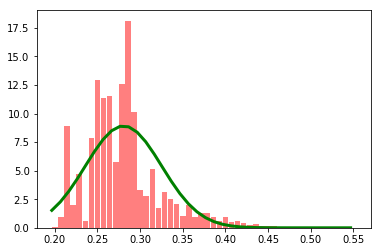

In [22]:
#画图
x = np.arange(res_min, res_max, 0.01)
y = normfun(x, res_bar, res_std)
plt.plot(x, y, color='g', linewidth=3)
plt.hist(res.reshape(114183,), bins=50, color='r', alpha=0.5, rwidth=0.9, normed=True)
#plt.hist(res.reshape(114183,), bins=50, color='r', alpha=0.5, rwidth=0.9, normed=False)
plt.show()

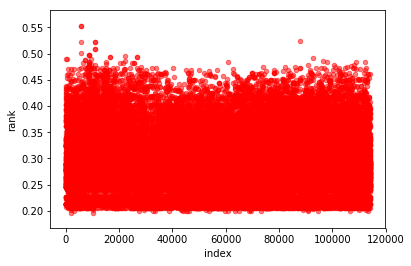

In [36]:
plot_scatter(res)

['Sheet1', 'Sheet2', 'Sheet3']
(9, 16)
res.shape =  (1, 9)


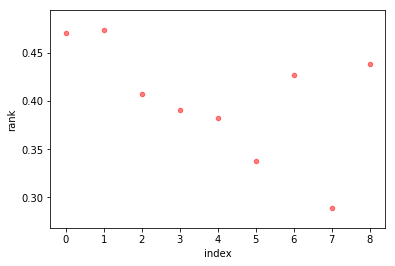

res =  [[0.47037733 0.47355138 0.40699013 0.39101058 0.38247456 0.33802596
  0.42722822 0.28908987 0.43884886]]
rows =  9
cols =  16
d1's shape =  (1, 9)
d2's shape =  (1, 9)


In [35]:
def getTableRes():
    # 读取test，获得题目一中的表格数据
    matric_table = read_excel('test.xlsx','Sheet2')
    # 初始化参数
    rows_table,cols_teble = matric_table.shape
    # rows_table 表示样本个数
    d1_table = np.zeros((1, rows_table))
    d2_table = np.zeros((1, rows_table))
    res_table = calTopsis(matric_table,d1_table,d2_table,rows_table)
    plot_scatter(res_table)
    res_table.reshape(res_table.shape[1],)
    #for i in range(len(res_table)):    
    print("res = ",res_table)
    print("rows = ",rows_table)
    print("cols = ",cols_teble)
    print("d1's shape = ",d1_table.shape)
    print("d2's shape = ",d2_table.shape)
getTableRes()